# Assignment - 1 : Supervised learning from scratch
    23M1080 Kartikey Sundriyal

**Q1** generates data matrix X with n rows and with columns that of G matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def genrate_X(n,G):

  m = np.array(G.shape)
  z=m[0]

  U = np.random.default_rng().normal(loc=0.0, scale=1.0, size=(n, z))
  # Generate a matrix U with standard normal distribution with mean 0 & var =1

  X = U @ G
  return X

**Q2**  generates target vector t of size Nx1 from inpit matrix X of size NxD, vector w of size D+1 and noise variance of sigma(σ)

In [3]:
def target_vector(X,w,sigma):

  w_ = w[1:]

  wt = (np.array(w_)).reshape(len(w_),1)

  X_ = np.array(X)
  '''
  print("X_")
  print(X_.dtype )
  print(X_.shape )

  print("wt")
  print(wt.dtype )
  print(wt.shape )
  '''

  bias = w[0]
  # print(X.shape)
  std = np.sqrt(sigma)
  noise = np.random.normal(loc=0, scale= std, size=(X_.shape[0],1))

  t = np.matmul(X, wt) + bias   + noise
  # print ("t.shape")
  # print (t.shape)
  # print (t)
  return t.reshape(len(t))

**Q3** Plots a graph of the time taken with respect to N with D fixed to 10.

YES, there is strange behavior in time taken to solve
the problem after N > 10^7 as computation increases.




In [ ]:
import time
G = np.random.randint(5, size=(10, 10))

print(G)
print()

t1 = []
x = []
for i in range(1, 100000, 100):
  x.append(i)
  # Record the start time
  start_time = time.time()
  X = genrate_X(i,G)
  X_inv = np.linalg.pinv(X)
  # Record the end time
  end_time = time.time()
  # Calculate the elapsed time
  elapsed_time = end_time - start_time

  t1.append(elapsed_time*1000)

print(t1)


[[1 0 3 1 2 1 1 3 0 2]
 [1 2 0 3 2 4 2 4 0 3]
 [4 0 3 2 0 1 3 4 3 2]
 [0 3 0 0 4 4 3 1 3 1]
 [3 2 3 4 4 1 1 2 3 1]
 [2 4 1 1 0 0 1 1 4 4]
 [3 3 2 3 4 1 0 1 1 0]
 [3 0 2 1 1 2 0 4 0 4]
 [1 3 3 1 3 2 0 1 0 0]
 [2 1 3 1 0 1 0 2 4 0]]

[0.3685951232910156, 0.2911090850830078, 0.3924369812011719, 0.3733634948730469, 0.40268898010253906, 0.5099773406982422, 0.48041343688964844, 0.5474090576171875, 0.5803108215332031, 0.6086826324462891, 1.7611980438232422, 1.2235641479492188, 1.0941028594970703, 1.085042953491211, 1.2230873107910156, 1.3356208801269531, 1.2531280517578125, 1.444101333618164, 1.4243125915527344, 1.4805793762207031, 1.5549659729003906, 1.6129016876220703, 1.847982406616211, 1.7757415771484375, 1.903533935546875, 1.8243789672851562, 1.9583702087402344, 2.0599365234375, 2.7196407318115234, 2.3047924041748047, 2.2542476654052734, 2.264261245727539, 2.3453235626220703, 6.595134735107422, 2.5463104248046875, 2.5551319122314453, 2.5925636291503906, 2.6099681854248047, 2.670764923095

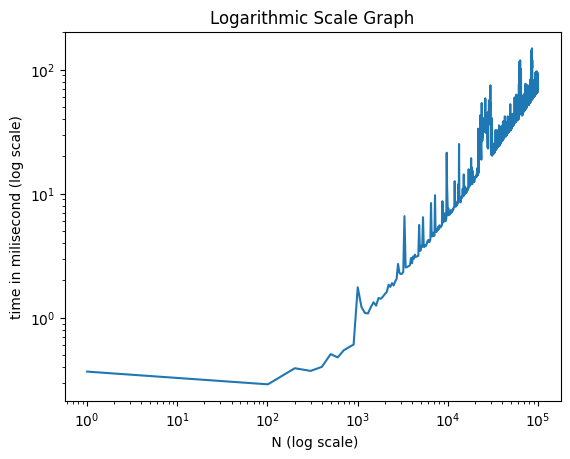

In [ ]:
y = t1 # in miliseconds

# Plot the graph with logarithmic scale on the y-axis
plt.plot(x,y)
plt.xscale("log")  # Set the x-axis to logarithmic scale
plt.yscale("log")  # Set the y-axis to logarithmic scale

# Add labels and title
plt.ylabel("time in milisecond (log scale)")
plt.xlabel(" N (log scale)")
plt.title("Logarithmic Scale Graph")

# Show the plot
plt.show()


**Q4** normalized root mean squared error (NRMSE)

error = true value - calculated value

MSE = (Summation of sq. of errors)/no. of samples

RMSE = sq.root of MSE

NRMSE = RMSE/std dev. of target vector

In [4]:
def NRMSE (t,y):
  mse=0
  se=0
  n= len(t)

  e = t-y

  for i in e:
    mse = mse + i**2

  rmse = (mse/n)**0.5

  std = np.std(t)



  normT = np.linalg.norm(e)

  if (normT == 0):
    return np.inf

  k = rmse/(std)

  return k



**Q5** Data Matrix X has dim N*D whereas w has dim D+1 ie. bias so I add an additional column of ones in X then find gradient of error wrt weights. Input is target t, Data Matrix X, weights w. Output is a vector of gradient of MSE wrt to weights.

In [5]:
def gradient_MSE(t,X,w):

  num_rows = X.shape[0]

  ones_column = np.ones((num_rows, 1))
  X1 = np.hstack((ones_column, X))

  y =np.dot(X1,w)
  e = t-y

  grad_MSE = -2 * np.dot(np.transpose(X1),e) /num_rows
  # print(grad_MSE)
  return grad_MSE

**Q6**  

In [6]:
def l2_norm_gradient(w):
  L2 = np.linalg.norm(w,2)
  w=np.array(w)
  # print(L2)
  grad = w/L2
  return grad

Q7

In [7]:
def l1_norm_gradient(w):

  return np.sign(w)


**Q8** stops after 10000 iterations or when norm of gradient is less than 0.01

In [8]:
def gradient_descent(t,X,w,k1,k2,gama):
  w1=w
  for j in range(10000):

    grad_MSE = gradient_MSE(t,X,w1)
    grad_L1 = l1_norm_gradient(w1)
    grad_L2 = l2_norm_gradient(w1)

    gradient = grad_MSE + k1* grad_L1  + k2 * grad_L2
    # print(gradient)
    w1 = w1 - gradient * gama

    if (np.linalg.norm(gradient) < 0.01):
    #  print (j )
     break
     return w1
  # print("not converge")
  return w1

**Q9** splits data matrix and target vector into training and validation set

In [10]:
def split_data(X, t, train_ratio):

    # Split data into training and validation subsets
    num_samples = X.shape[0]
    train_size = int(num_samples * train_ratio)
    indices = np.arange(num_samples)
    X_train = X[indices[:train_size]]
    X_val = X[indices[train_size:]]
    t_train = t[indices[:train_size]]
    t_val = t[indices[train_size:]]

    return X_train, X_val, t_train, t_val

Avg NRMSE increases as variance increases

Enter number of samples1000


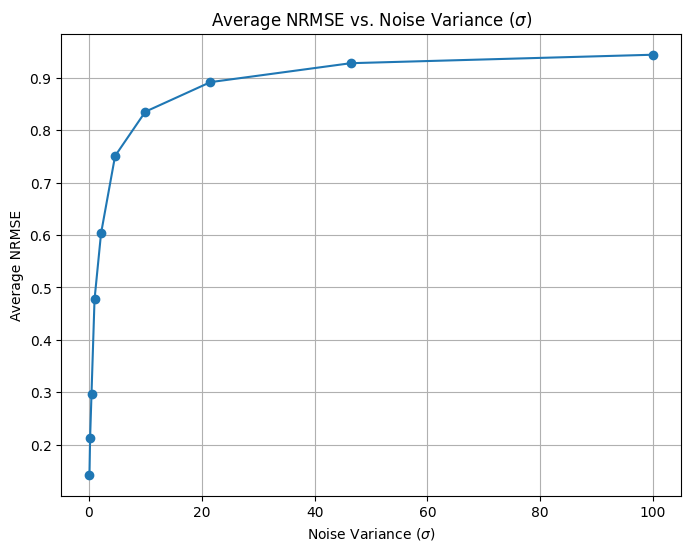

In [11]:
G = np.eye(5)
n = int(input("Enter number of samples"))
sigma = np.logspace(-1,2, num=10)
X=genrate_X(n,G)
# print(X)
X= np.array(X)
w = [1,1,1,1,1,1]
l = len(w)
gama = 0.01
k1 = 0.001
k2 = 0.04
error=[]
train_ratio = 0.8


# Results storage
avg_nrmse_results =[]

# Fixed generator matrix G
# G = np.eye(D)
# w = np.ones(D+1)
# Experiment

for  s in sigma:
    error = []
    X=genrate_X(n,G)

    X= np.array(X)
    for _ in range(5):  # Repeat the experiment 5 times


      t = target_vector(X,w,s)
      (X_train, X_val, t_train, t_val) = split_data(X, t, train_ratio)

      w = gradient_descent(t_train,X_train,w,k1,k2,gama)
      y = X_val @ w[1:] + w[0]

      e = NRMSE (t_val,y)
      error.append(e)


    # Average NRMSE over multiple runs
    avg_nrmse = np.mean(error)
    avg_nrmse_results.append(avg_nrmse)

#Plotting
plt.figure(figsize=(8, 6))
# plt.xscale("log")  # Set the x-axis to logarithmic scale
# plt.yscale("log")  # Set the y-axis to logarithmic scale
plt.plot(sigma, avg_nrmse_results, marker='o', linestyle='-')
plt.title('Average NRMSE vs. Noise Variance ($\sigma$)')
plt.xlabel('Noise Variance ($\sigma$)')
plt.ylabel('Average NRMSE')
plt.grid(True)
plt.show()


**Q10**

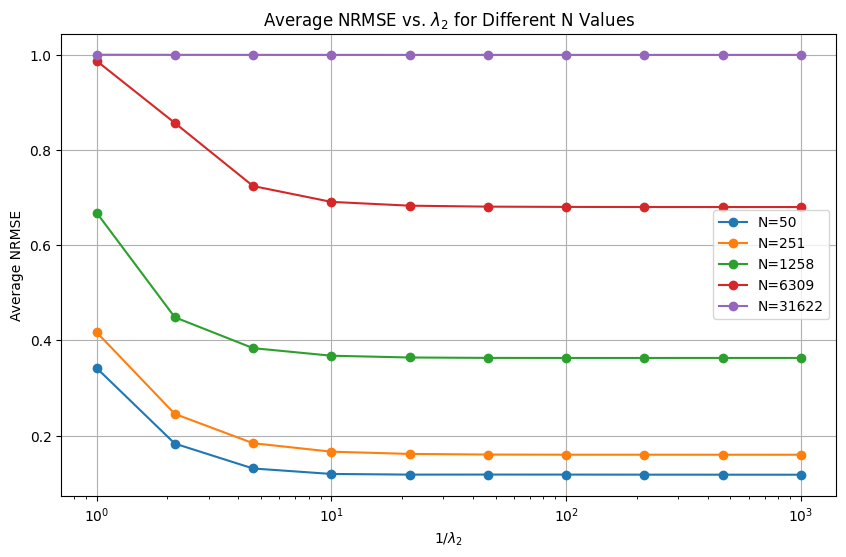

In [12]:
D = 5 # Number of features
sigma = 0.1
lambda2_values = np.logspace(-3, 0, num=10)  # List of lambda2 values
N_values = np.logspace(1.7, 4.5,5, dtype=int)  # List of sample sizes N
gama = 0.01
# Results storage
avg_nrmse_results = np.zeros((len(N_values), len(lambda2_values)))
k1=0
# Fixed generator matrix G
G = np.eye(D)
w = np.random.randn(D+1)
# Experiment
for i, N in enumerate(N_values):


    X=genrate_X(N,G)
    X= np.array(X)
    t = target_vector(X,w,sigma)
    (X_train, X_val, t_train, t_val) = split_data(X, t, train_ratio)


    for j, k2 in enumerate(lambda2_values):
        MisClass_list = []
        for _ in range(5):  # Repeat the experiment 5 times


          w = gradient_descent(t_train,X_train,w,k1,k2,gama)
          y = X_val @ w[1:] + w[0]

          e = NRMSE (t_val,y)
          MisClass_list.append(e)

        avg_nrmse = np.mean(nrmse_list)
        avg_nrmse_results[i, j] = avg_nrmse

# print(avg_nrmse_results)
# Plotting
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_values):
    plt.plot(1/np.array(lambda2_values), avg_nrmse_results[i,:], marker='o', label=f'N={N}')

plt.title('Average NRMSE vs. $\lambda_2$ for Different N Values')
plt.xlabel('1/$\lambda_2$')
plt.ylabel('Average NRMSE')
plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

Q11

Enter number of samples 100


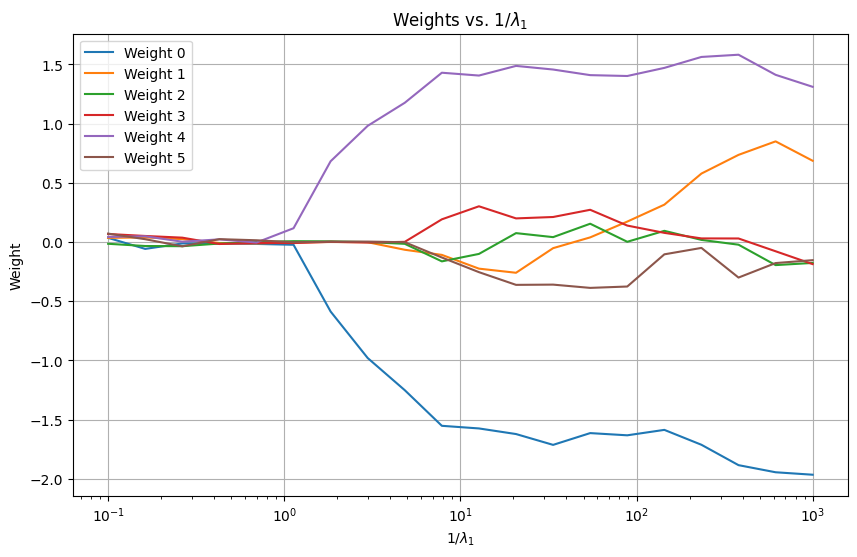

In [30]:
D=5
k1 = np.logspace(-3, 1, num=20)
k2 = 0
weights=[]
G = np.eye(D)
n = int(input("Enter number of samples "))
sigma = 1
gama = 0.01

train_ratio = 0.8
X=genrate_X(n,G)
# print(X)
X= np.array(X)

w = np.random.randn(D+1)

for i in k1:
 t = target_vector(X,w,sigma)
 # (X_train, X_val, t_train, t_val) = split_data(X, t, train_ratio)
 # w = gradient_descent(t_train,X_train,w,k1,k2,gama)
 w = gradient_descent(t,X,w,i,k2,gama)

 weights.append(w)

plt.figure(figsize=(10, 6))
for i in range(len(weights[0])):
    plt.plot(1 / np.array(k1), [w[i] for w in weights], label=f'Weight {i}')
plt.title('Weights vs. 1/$\lambda_1$')
plt.xlabel('1/$\lambda_1$')
plt.ylabel('Weight')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


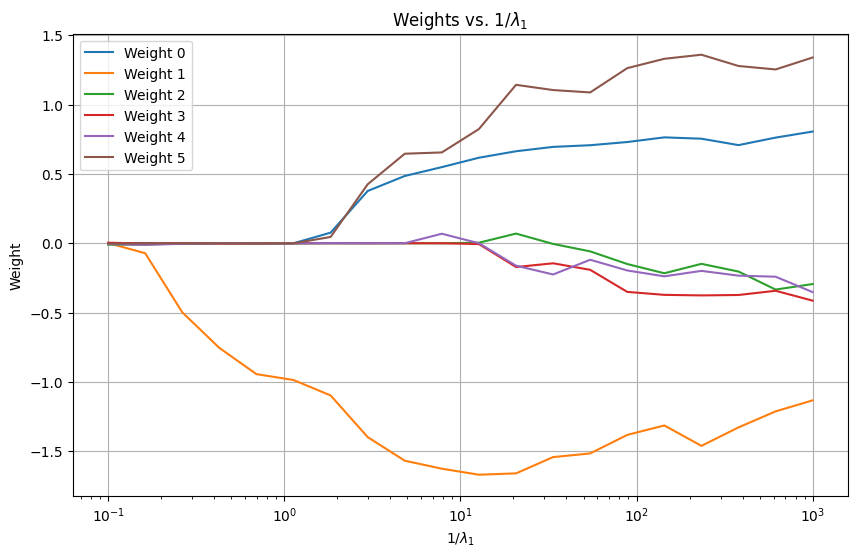

In [34]:
d=5
m=5
k1 = np.logspace(-3, 1, num=20)
k2 = 0
weights=[]
G= np.random.uniform(0.5,1.5,(m,d))
G = np.array(G)

sigma = 0.5
gama = 0.001

train_ratio = 0.8
X=genrate_X(n,G)
# print(X)
X= np.array(X)

w = np.random.randn(D+1)

for i in k1:
 t = target_vector(X,w,sigma)
 # (X_train, X_val, t_train, t_val) = split_data(X, t, train_ratio)
 # w = gradient_descent(t_train,X_train,w,k1,k2,gama)
 w = gradient_descent(t,X,w,i,k2,gama)
#  print(w)
 weights.append(w)

plt.figure(figsize=(10, 6))
for i in range(len(weights[0])):
    plt.plot(1 / np.array(k1), [w[i] for w in weights], label=f'Weight {i}')
plt.title('Weights vs. 1/$\lambda_1$')
plt.xlabel('1/$\lambda_1$')
plt.ylabel('Weight')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()


Q12

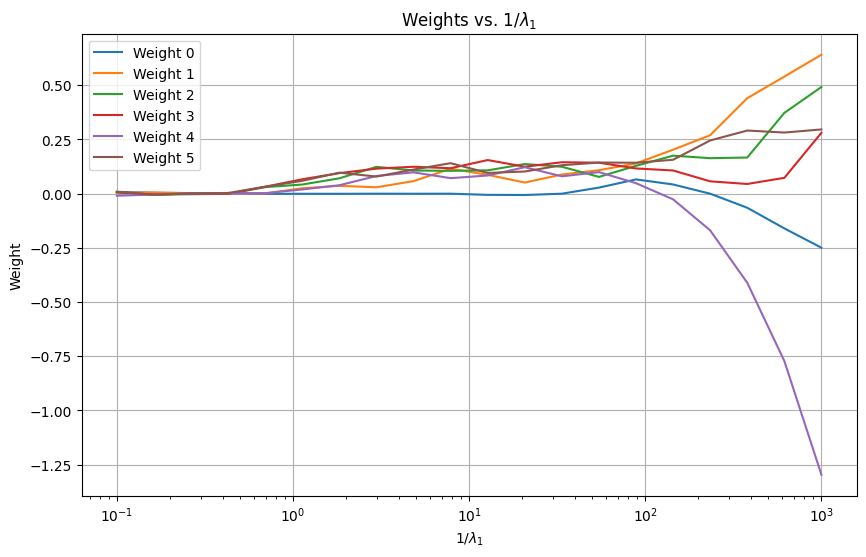

In [37]:
d=5
m=5
k1 = np.logspace(-3, 1, num=20)
k2 = 0.5
weights=[]
G= np.random.uniform(0.5,1.5,(m,d))
G = np.array(G)

sigma = 0.5
gama = 0.001

train_ratio = 0.8
X=genrate_X(n,G)
# print(X)
X= np.array(X)

w = np.random.randn(D+1)

for i in k1:
 t = target_vector(X,w,sigma)
 # (X_train, X_val, t_train, t_val) = split_data(X, t, train_ratio)
 # w = gradient_descent(t_train,X_train,w,k1,k2,gama)
 w = gradient_descent(t,X,w,i,k2,gama)
#  print(w)
 weights.append(w)

plt.figure(figsize=(10, 6))
for i in range(len(weights[0])):
    plt.plot(1 / np.array(k1), [w[i] for w in weights], label=f'Weight {i}')
plt.title('Weights vs. 1/$\lambda_1$')
plt.xlabel('1/$\lambda_1$')
plt.ylabel('Weight')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

[ 0.26867646 -0.39847901 -0.35041539 -0.20513959  0.18470325  0.49291926]
[ 0.1137163  -0.13032416 -0.07896906 -0.00432044 -0.03035772 -0.00345376]


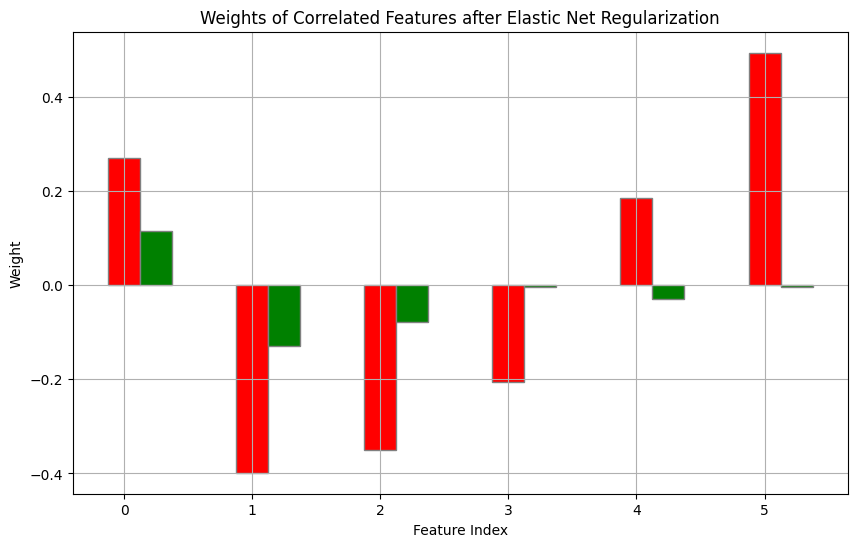

In [ ]:
n=50
d=5
m=3
G= np.random.uniform(0.5,1.5,(m,d))
X= genrate_X(n,G)
# w=np.ones(d+1)
w= np.random.uniform(-0.5,0.5,d+1)
w_ = w
t= target_vector(X,w,1)
k1=0.01

k2=0.5

gama = 0.05


print(w)
# print(np.linalg.norm(w))
# print(l1_norm_gradient(w))
# print(l2_norm_gradient(w))
w=gradient_descent(t,X,np.copy(w),k1,k2,gama)

print(w)



N, D = X.shape
# Plot the weights
plt.figure(figsize=(10, 6))
# plt.bar(range(D+1), w_)
# plt.bar(range(D+1), w)

barWidth =0.25
br1 = np.arange(len(w_))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,w_, color ='r', width = barWidth, edgecolor ='grey')
plt.bar(br2,w , color ='g', width = barWidth, edgecolor ='grey')

plt.title('Weights of Correlated Features after Elastic Net Regularization')
plt.xlabel('Feature Index')
plt.ylabel('Weight')
plt.grid(True)
plt.show()



**Q13**



yᵢ = Sign(wᵀxᵢ + b) = {0,1}

In [18]:
def target_binary(X, w, sigma):

    w_ = w[1:]

    wt = (np.array(w_)).reshape(len(w_),1)

    X_ = np.array(X)

    bias = w[0]
    # print(X.shape)
    std = np.sqrt(sigma)
    noise = np.random.normal(loc=0, scale= std, size=(X_.shape[0],1))

    t = np.matmul(X_, wt) + bias  + noise
    # print ("t.shape")
    # print (t.shape)
    # print (t)

    # Apply thresholding to convert scores to binary labels
    t = (t >= 0).astype(int)
    return t.reshape(len(t))
sigma = 0.2
D=3
G = np.eye(D)
w = np.ones(D+1)
X=genrate_X(50,G)
l=target_binary(X, w, sigma)
print(l)

[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1]


**Q14**

zᵢ = σ(hᵢ) = 1 / [1+exp(−[wᵀxᵢ+b])]

BCE = Lᵢ = − yᵢ log zᵢ − (1−yᵢ) log (1−zᵢ)

∂Lᵢ/∂wₖ = ∂Lᵢ/∂zᵢ . ∂zᵢ/∂hᵢ . ∂hᵢ/∂wₖ = (zᵢ-yᵢ) . xᵢₖ

      

In [20]:
def binary_cross_entropy_gradient(t,X,w):


    num_rows = X.shape[0]
    ones_column = np.ones((num_rows, 1))
    X1 = np.hstack((ones_column, X))

    h= np.dot(X1, w)

    sigmoid = 1 / (1 + np.exp(-h))
    grad =  np.matmul(X1.T,sigmoid-t )

    return grad
sigma =0.5
D=3
G = np.eye(D)
w = np.ones(D+1)
X=genrate_X(100,G)
t=target_binary(X, w, sigma)
l=binary_cross_entropy_gradient(t,X,w)
print(l)

[-3.76934357 -6.29490138 -4.73330212 -2.2612347 ]


In [21]:
def gradient_descent_binary(t,X,w1,k1,k2,gama):
  w=w1
  for j in range(10000):

    grad_BCE = binary_cross_entropy_gradient(t,X,w)
    grad_L1 = l1_norm_gradient(w)
    grad_L2 = l2_norm_gradient(w)

    gradient = grad_BCE + k1* grad_L1  + k2 * grad_L2
    w = w - gradient * gama

    if (np.linalg.norm(gradient) < 0.01):
    #  print (j )
     return w
  # print("not converge")
  return w

sigma =0.5
D=3
k1=0.01
k2=1

gama = 0.01
G = np.eye(D)
w = np.ones(D+1)
X=genrate_X(100,G)
t=target_binary(X, w, sigma)
aaaa=gradient_descent_binary(t,X,w,k1,k2,gama)
# l=binary_cross_entropy_gradient(t,X,w)
print(aaaa)

[2.24066207 2.1796448  1.9268885  2.24235534]


Q15

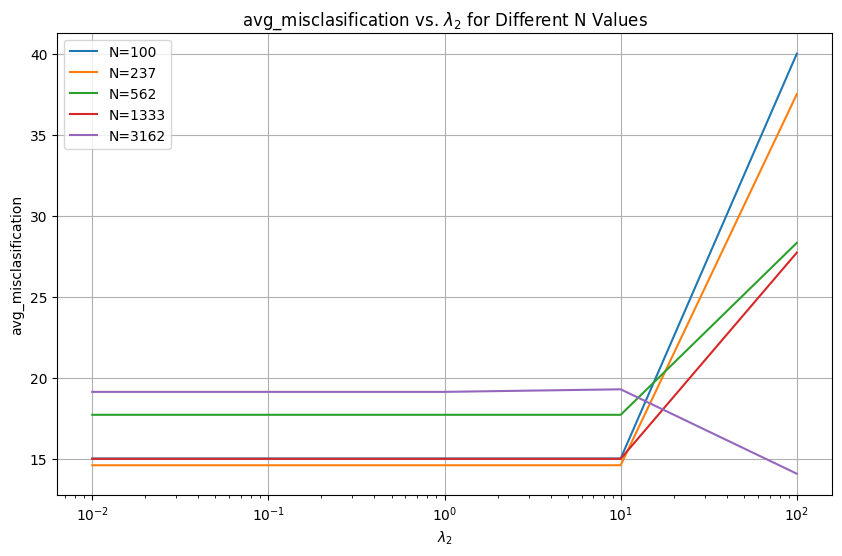

In [42]:
# Parameters
D = 5  # Number of features
sigma = 0.5  # Noise variance
k1=0
lambda2_values = np.logspace(-2, 2, num=5)  # List of lambda2 values
N_values = np.logspace(2, 3.5, num=5, dtype=int)  # List of sample sizes N
gama = 0.01  # Learning rate for gradient descent


# Results storage
avg_misclasification = np.zeros((len(N_values), len(lambda2_values)))

# Fixed generator matrix G

G = np.eye(D)
train_ratio = 0.8
# Experiment
for i, N in enumerate(N_values):
    X=genrate_X(N,G)

    X= np.array(X)
    w = np.random.uniform(-1,1,D+1)
    t = target_binary(X,w,sigma)

    (X_train, X_val, t_train, t_val) = split_data(X, t, train_ratio)
    for j, k2 in enumerate(lambda2_values):
        percent_error_list = []
        for _ in range(5):  # Repeat the experiment 5 times



            w = gradient_descent_binary(t,X,w,k1,k2,gama)
            y = X_val @ w[1:] + w[0]
            y_pred =  (y >= 0).astype(int)

            similar_elements = t_val != y_pred
            count = np.count_nonzero(similar_elements)
            percent_error = count/len(y_pred)*100
            percent_error_list.append(percent_error)



        avg_percent_error = np.mean(percent_error_list)
        avg_misclasification[i, j] = avg_percent_error

plt.figure(figsize=(10, 6))
for i, N in enumerate(N_values):
    plt.plot(lambda2_values, avg_misclasification[i,:], label=f'N={N}')

plt.title('avg_misclasification vs. $\lambda_2$ for Different N Values')
plt.xlabel('$\lambda_2$')
plt.ylabel('avg_misclasification')
plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


***References***

1. Chat gpt and Gemini
2. https://numpy.org/
3. geeks for geeks
4. Lecture notes
5. help from batchmate: Devayan 23M1079